Introduction (Background Purpose, scope)

The 8-puzzle and 8-queens problems are classic examples of problems in the domain of artificial intelligence. The 8-puzzle problem is solved by arranging the tiles to a specified configuration. On the other hand, the 8-queens problem is solved when none of the queens are attacking each other. The purpose of this assignment is to evaluate the performance of hill climbing (steepest-ascent and first-choice variants), hill climbing with random restart and simulated annealing algorithms when solving these problems. The performance of these algorithms are measured by the search cost and the percentage solved of the problem. The assignment focuses on implementing the search algorithms mentioned before. The evaluation of effectiveness of these algorithms will be conducted on a large number of instances for both problems. In consequence, we identified the most suitable algorithm to solve the problems by considering the search cost and solution quality. 


Theoretical background

The 4 search algorithms used are all local search algorithms, meaning that they will move from one state to a neighboring state until an optimal solution is found. They are all sucseptible to getting stuck in local maximums instead of reaching the global maximum.

However, some of the algorithms may be more effective than others in finding the global maxima. This is mostly due to their strategies for selecting a neighbouring state. We hypothesise that the hill climbing algorithm (Steepest-Ascent and First-Choice variants) will be the least optimal algorithm; both always choose a greater state than the current state, and this could lead to a greater chance of getting stuck in a local maxima [1]. The Hill Climbing with random start should perform better than the other variants because it always restarts the process from a random initial state in each run [1]. Some of these initial states may be closer to the goal state, so this algorithm could reach the goal state a greater percentage of the instances. We hypothesize that the simulated annealing algorithm will be the most optimal because of the probabilistic aspect in its choice making [1]. It has the chance to escape local maxima and move towards global maxima.

We used the functions in the UC Berkeley code repository [2] to write our codes. The 8-puzzle and 8-queen problems, search algorithms, a function to test the algorithms, and other functions necessary were extracted from the repository. In the case of the 8-puzzle problem, the testing function ran 100 instances for each algorithm and the process was repeated 6 times. For the 8-queens problem, the testing function ran 100 instances for each algorithm and the process repeated 5 times. The repetitions were done to observe if there were any fluctuations in the results. The testing function returns the average processing time, average solution length, and percentage of solved problems.


Results

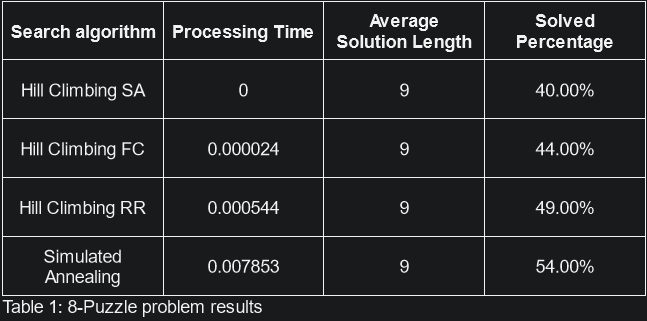

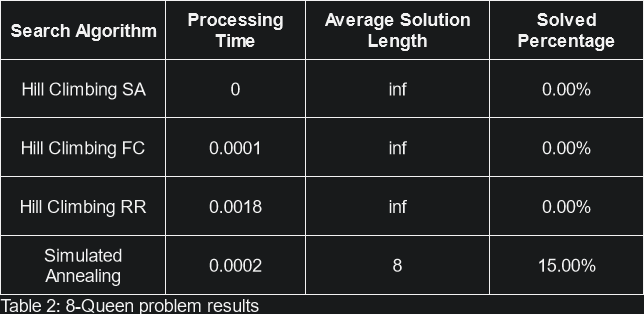

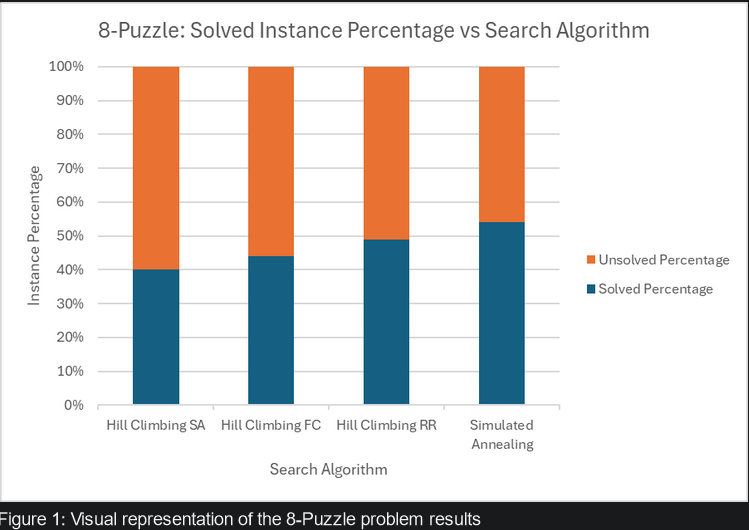

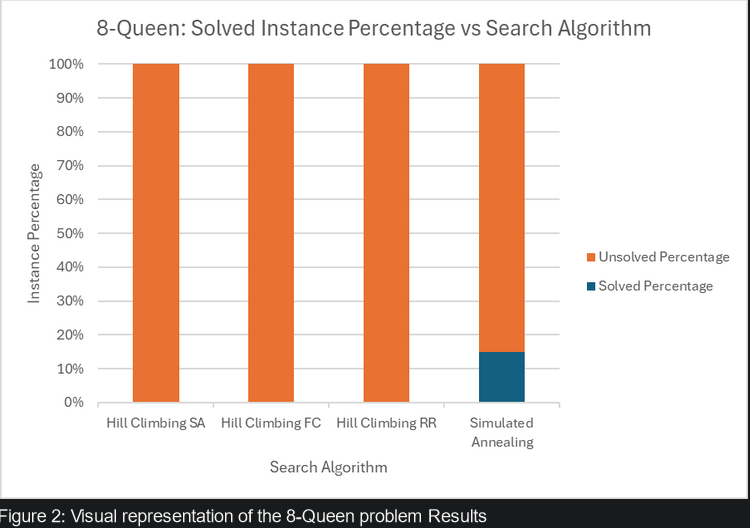

Discussion

The evaluation of the 8-puzzle problem was tested with various configurations to test different algorithms. Among the 4 algorithms examined, hill climbing employing steepest-ascent was the worst in terms of solutions with a 40% success rate. The reason behind this poor performance is because this algorithm bases its movement towards the one that approaches the most the state goal. It also does not backtrack and it stops if it cannot advance further. The hillclimbing with first-choice algorithm improved slightly the success rate to 44%. It improved because instead of choosing the next step that approaches the most to the goal state, it selects its movements randomly. This may result in fewer steps to find a solution. The time taken by these two algorithms were similar. The hill climbing with random restart also improved the success rate to 49%. This algorithm restarts the process of finding a solution from random initial states. Employing this method the algorithm avoids getting stuck in the local optima. The most efficient algorithm was the simulated annealing with a 54% success rate. This algorithm takes a competition of probability of taking bad moves to improve the efficiency over time and escape local maxima. However, this algorithm showed a higher computational time consumption because of the extra calculations it takes into consideration.

The 8-queen problem was also evaluated with different configurations. The hill climbing and its variations resulted in success rates of 0%. The reason why the hill climbing and its variantes were unable to find a solution is because of their inability to escape local optima. In other words,if the initial state is not near a global solution of the problem, then the algorithms will fail to find a solution. Simulated annealing compared with these algorithms demonstrated to be the most efficient by a success rate of 15% and a solution length of 8. The reason why the simulated annealing was able to find a solution is that it allows movements to worst cases with the opt htat the state will increment in efficiency over time. In consequence, it is a way to escape the local optima. Finally, in contrast with the 8-puzzle problem, all the algorithms showed similar computational times.

The variability observed in each run of both problems are due to several factors inherent to the search algorithms. Firstly, the stochastic nature of algorithms and instance generation results in unique configurations with varying difficulty levels. Additionally, random selection of moves in algorithms contributes to divergence in paths through the search space. The difference in effectiveness between these algorithms depends greatly on the strengths and weaknesses of them. Also, the number of steps taken to the solution can also affect the final result. For example, the hill climbing with random restart greatly depends on how many restarts it does, in order to obtain a more successful rate, it will have to increase the number of restarts. However, increasing the number of restarts results in greater computational time. The complexity of these problems also indicates that there is no single solution or algorithm that can be described as the best. 


Conclusion

This experiment underscores the importance of selecting the appropriate algorithm and conducting tests to measure its effectiveness. In tackling the 8-puzzle problem, the results revealed that the Simulated Annealing algorithm had the highest success rate, followed by Hill Climbing Random Restart, First-Choice, and finally, Steepest-Ascent algorithms. Conversely, when confronting the 8-queen problem, only the Simulated Annealing algorithm successfully found solutions, although at a low success  rate. However, while Simulated Annealing proved to be the most optimal choice for these problems, it also had a greater processing time. This factor must be weighed when selecting a search algorithm to effectively solve a given problem.


References

[1] S. J. Russell, P. Norvig, and E. Davis, Artificial intelligence: A Modern Approach. Prentice Hall, 2010.

[2]  "GitHub - aimacode/aima-python: Python implementation of algorithms from Russell And Norvig's "Artificial Intelligence - A Modern Approach"," [Online]. Available: https://github.com/aimacode/aima-python. [Accessed 31 March 2024].

Work Distribution

Javier- Report and Presentation

Reinaldo- Report and Presentation

Anton- Code and Report

# 8-puzzle

In [87]:
from search import Problem, Node
import random
import itertools
import numpy as np
import sys
import time

class EightPuzzle(Problem):
    def __init__(self, initial, goal=(1, 2, 3, 4, 5, 6, 7, 8, 0)):
        super().__init__(initial, goal)

    def find_blank_square(self, state):
        return state.index(0)

    def actions(self, state):
        possible_actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        index_blank_square = self.find_blank_square(state)

        if index_blank_square % 3 == 0:
            possible_actions.remove('LEFT')
        if index_blank_square < 3:
            possible_actions.remove('UP')
        if index_blank_square % 3 == 2:
            possible_actions.remove('RIGHT')
        if index_blank_square > 5:
            possible_actions.remove('DOWN')

        return possible_actions

    def result(self, state, action):
        blank = self.find_blank_square(state)
        new_state = list(state)
        delta = {'UP': -3, 'DOWN': 3, 'LEFT': -1, 'RIGHT': 1}
        neighbor = blank + delta[action]
        new_state[blank], new_state[neighbor] = new_state[neighbor], new_state[blank]
        return tuple(new_state)

    def goal_test(self, state):
        return state == self.goal

    def value(self, state):
        return sum(s != g for (s, g) in zip(state, self.goal))


In [88]:
def hill_climbing_steepest_ascent(problem):
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        if not neighbors:
            break
        neighbor = max(neighbors, key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            break
        current = neighbor
    return current.state


In [89]:
def hill_climbing_first_choice(problem):
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        random.shuffle(neighbors)  # Mezcla aleatoriamente los vecinos
        for neighbor in neighbors:
            if problem.value(neighbor.state) < problem.value(current.state):
                current = neighbor
                break
        else:  # If a better neighbor was not found
            break
    return current.state


In [90]:
def hill_climbing_random_restart(problem, num_restarts):
    best = None
    best_value = float('inf')
    for _ in range(num_restarts):
        solution = hill_climbing_steepest_ascent(problem)
        solution_value = problem.value(Node(solution).state)
        if solution_value < best_value:
            best = solution
            best_value = solution_value
    return best


In [91]:
def simulated_annealing(problem, schedule):
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current.state  # Make sure you return the state, not the full node
        neighbors = current.expand(problem)
        if not neighbors:
            return current.state
        next_choice = random.choice(neighbors)
        delta_e = problem.value(next_choice.state) - problem.value(current.state)
        if delta_e < 0 or random.uniform(0, 1) < np.exp(-delta_e / T):
            current = next_choice


In [92]:
def exp_schedule(k=20, lam=0.005, limit=1000):
    return lambda t: (k * np.exp(-lam * t) if t < limit else 0)


In [93]:
def generate_random_instance():
    instance = list(range(9))
    random.shuffle(instance)
    return tuple(instance)

def is_soluble(instance):
    inversions = 0
    for i in range(len(instance)):
        for j in range(i + 1, len(instance)):
            if instance[i] > instance[j] and instance[i] != 0 and instance[j] != 0:
                inversions += 1
    return inversions % 2 == 0

In [94]:
def test_algorithm(algorithm, problem_class, goal_state, num_instances=100):
    times = []
    solution_lengths = []
    solved_count = 0

    for _ in range(num_instances):
        initial_state = generate_random_instance()  # Generate random instance
        soluble = is_soluble(initial_state)  # Check if it is soluble
        if not soluble:
            continue  # If it is not solvable, go to the next iteration
        
        problem = problem_class(initial_state, goal_state)
        start_time = time.time()
        solution = algorithm(problem)
        end_time = time.time()

        if solution:
            solved_count += 1
            solution_length = len(solution.solution()) if isinstance(solution, Node) else len(solution)
            solution_lengths.append(solution_length)
        else:
            solution_lengths.append(None)

        times.append(end_time - start_time)

    avg_time = sum(times) / len(times)
    avg_solution_length = sum(filter(None, solution_lengths)) / len(solution_lengths) if solution_lengths else float('inf')
    solved_percentage = (solved_count / num_instances) * 100

    print(f"Average time: {avg_time: f} seconds")
    print(f"Average solution length: {avg_solution_length}")
    print(f"Solved Percentage: {solved_percentage}%")


In [95]:
goal_state = (1, 2, 3, 4, 5, 6, 7, 8, 0)

# Hill Climbing Steepest-Ascent
test_algorithm(hill_climbing_steepest_ascent, EightPuzzle, goal_state)

# Hill Climbing First-Choice
test_algorithm(hill_climbing_first_choice, EightPuzzle, goal_state)

# Hill Climbing con Reinicio Aleatorio
test_algorithm(lambda p: hill_climbing_random_restart(p, num_restarts=30), EightPuzzle, goal_state)

# Simulated Annealing
test_algorithm(lambda p: simulated_annealing(p, schedule=exp_schedule()), EightPuzzle, goal_state)

Average time:  0.000000 seconds
Average solution length: 9.0
Solved Percentage: 40.0%
Average time:  0.000024 seconds
Average solution length: 9.0
Solved Percentage: 44.0%
Average time:  0.000544 seconds
Average solution length: 9.0
Solved Percentage: 49.0%
Average time:  0.007853 seconds
Average solution length: 9.0
Solved Percentage: 54.0%


In [96]:
goal_state = (1, 2, 3, 4, 5, 6, 7, 8, 0)

# Hill Climbing Steepest-Ascent
test_algorithm(hill_climbing_steepest_ascent, EightPuzzle, goal_state)

# Hill Climbing First-Choice
test_algorithm(hill_climbing_first_choice, EightPuzzle, goal_state)

# Hill Climbing con Reinicio Aleatorio
test_algorithm(lambda p: hill_climbing_random_restart(p, num_restarts=30), EightPuzzle, goal_state)

# Simulated Annealing
test_algorithm(lambda p: simulated_annealing(p, schedule=exp_schedule()), EightPuzzle, goal_state)

Average time:  0.000029 seconds
Average solution length: 9.0
Solved Percentage: 52.0%
Average time:  0.000001 seconds
Average solution length: 9.0
Solved Percentage: 54.0%
Average time:  0.000576 seconds
Average solution length: 9.0
Solved Percentage: 49.0%
Average time:  0.008173 seconds
Average solution length: 9.0
Solved Percentage: 44.0%


In [97]:
goal_state = (1, 2, 3, 4, 5, 6, 7, 8, 0)

# Hill Climbing Steepest-Ascent
test_algorithm(hill_climbing_steepest_ascent, EightPuzzle, goal_state)

# Hill Climbing First-Choice
test_algorithm(hill_climbing_first_choice, EightPuzzle, goal_state)

# Hill Climbing con Reinicio Aleatorio
test_algorithm(lambda p: hill_climbing_random_restart(p, num_restarts=30), EightPuzzle, goal_state)

# Simulated Annealing
test_algorithm(lambda p: simulated_annealing(p, schedule=exp_schedule()), EightPuzzle, goal_state)

Average time:  0.000000 seconds
Average solution length: 9.0
Solved Percentage: 56.99999999999999%
Average time:  0.000020 seconds
Average solution length: 9.0
Solved Percentage: 51.0%
Average time:  0.000604 seconds
Average solution length: 9.0
Solved Percentage: 49.0%
Average time:  0.008237 seconds
Average solution length: 9.0
Solved Percentage: 49.0%


In [98]:
goal_state = (1, 2, 3, 4, 5, 6, 7, 8, 0)

# Hill Climbing Steepest-Ascent
test_algorithm(hill_climbing_steepest_ascent, EightPuzzle, goal_state)

# Hill Climbing First-Choice
test_algorithm(hill_climbing_first_choice, EightPuzzle, goal_state)

# Hill Climbing con Reinicio Aleatorio
test_algorithm(lambda p: hill_climbing_random_restart(p, num_restarts=30), EightPuzzle, goal_state)

# Simulated Annealing
test_algorithm(lambda p: simulated_annealing(p, schedule=exp_schedule()), EightPuzzle, goal_state)

Average time:  0.000021 seconds
Average solution length: 9.0
Solved Percentage: 48.0%
Average time:  0.000017 seconds
Average solution length: 9.0
Solved Percentage: 59.0%
Average time:  0.000433 seconds
Average solution length: 9.0
Solved Percentage: 53.0%
Average time:  0.009391 seconds
Average solution length: 9.0
Solved Percentage: 50.0%


In [99]:
goal_state = (1, 2, 3, 4, 5, 6, 7, 8, 0)

# Hill Climbing Steepest-Ascent
test_algorithm(hill_climbing_steepest_ascent, EightPuzzle, goal_state)

# Hill Climbing First-Choice
test_algorithm(hill_climbing_first_choice, EightPuzzle, goal_state)

#  Hill Climbing con Reinicio Aleatorio
test_algorithm(lambda p: hill_climbing_random_restart(p, num_restarts=30), EightPuzzle, goal_state)

# Simulated Annealing
test_algorithm(lambda p: simulated_annealing(p, schedule=exp_schedule()), EightPuzzle, goal_state)

Average time:  0.000023 seconds
Average solution length: 9.0
Solved Percentage: 44.0%
Average time:  0.000000 seconds
Average solution length: 9.0
Solved Percentage: 42.0%
Average time:  0.000445 seconds
Average solution length: 9.0
Solved Percentage: 51.0%
Average time:  0.008356 seconds
Average solution length: 9.0
Solved Percentage: 51.0%


In [100]:
goal_state = (1, 2, 3, 4, 5, 6, 7, 8, 0)

# Hill Climbing Steepest-Ascent
test_algorithm(hill_climbing_steepest_ascent, EightPuzzle, goal_state)

# Hill Climbing First-Choice
test_algorithm(hill_climbing_first_choice, EightPuzzle, goal_state)

# Hill Climbing con Reinicio Aleatorio
test_algorithm(lambda p: hill_climbing_random_restart(p, num_restarts=30), EightPuzzle, goal_state)

# Simulated Annealing
test_algorithm(lambda p: simulated_annealing(p, schedule=exp_schedule()), EightPuzzle, goal_state)

Average time:  0.000020 seconds
Average solution length: 9.0
Solved Percentage: 51.0%
Average time:  0.000027 seconds
Average solution length: 9.0
Solved Percentage: 52.0%
Average time:  0.000480 seconds
Average solution length: 9.0
Solved Percentage: 50.0%
Average time:  0.008267 seconds
Average solution length: 9.0
Solved Percentage: 52.0%


# 8-queens

In [85]:
from search import Problem, Node
import random
import numpy as np
import sys
import time

class NQueensProblem(Problem):
    def __init__(self, N):
        super().__init__(tuple([-1] * N))
        self.N = N

    def actions(self, state):
        if state[-1] != -1:
            return []
        else:
            col = state.index(-1)
            return [row for row in range(self.N) if not self.conflicted(state, row, col)]

    def result(self, state, row):
        col = state.index(-1)
        new = list(state[:])
        new[col] = row
        return tuple(new)

    def conflicted(self, state, row, col):
        return any(self.conflict(row, col, state[c], c) for c in range(col))

    def conflict(self, row1, col1, row2, col2):
        return (row1 == row2 or col1 == col2 or row1 - col1 == row2 - col2 or row1 + col1 == row2 + col2)

    def goal_test(self, state):
        if state[-1] == -1:
            return False
        return not any(self.conflicted(state, state[col], col) for col in range(len(state)))

    def h(self, node):
        num_conflicts = 0
        for (r1, c1) in enumerate(node.state):
            for (r2, c2) in enumerate(node.state):
                if (r1, c1) != (r2, c2):
                    num_conflicts += self.conflict(r1, c1, r2, c2)
        return num_conflicts

    def value(self, state):
        # Calculates the negative value of conflicts directly based on state.
        num_conflicts = 0
        for (r1, c1) in enumerate(state):
            for (r2, c2) in enumerate(state):
                if c1 != -1 and c2 != -1 and (r1, c1) != (r2, c2):  # Ensures that only placed queens are compared.
                    num_conflicts += self.conflict(r1, c1, r2, c2)
        return -num_conflicts

# Algorithms definitions
def hill_climbing_steepest_ascent(problem):
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        if not neighbors:
            break
        neighbor = max(neighbors, key=lambda node: problem.value(node.state))
        if problem.value(neighbor.state) <= problem.value(current.state):
            break
        current = neighbor
    return current.state

def hill_climbing_first_choice(problem):
    current = Node(problem.initial)
    while True:
        neighbors = current.expand(problem)
        random.shuffle(neighbors)  # Randomly shuffle neighbors
        for neighbor in neighbors:
            if problem.value(neighbor.state) < problem.value(current.state):
                current = neighbor
                break
        else:  # If a better neighbor was not found
            break
    return current.state

def hill_climbing_random_restart(problem, num_restarts):
    best = None
    best_value = float('inf')
    for _ in range(num_restarts):
        solution = hill_climbing_steepest_ascent(problem)
        solution_value = problem.value(Node(solution).state)
        if solution_value < best_value:
            best = solution
            best_value = solution_value
    return best

def simulated_annealing(problem, schedule):
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current.state
        neighbors = current.expand(problem)
        if not neighbors:
            return current.state
        next_choice = random.choice(neighbors)
        delta_e = problem.value(next_choice.state) - problem.value(current.state)
        if delta_e < 0 or random.uniform(0, 1) < np.exp(-delta_e / T):
            current = next_choice

def exp_schedule(k=100, lam=0.001, limit=100):
    return lambda t: (k * np.exp(-lam * t) if t < limit else 0)

#testing stage
def test_algorithm(algorithm, problem_class, N, num_instances=100):
    times = []
    solution_lengths = []
    solved_count = 0

    for _ in range(num_instances):
        problem = problem_class(N)
        start_time = time.time()
        solution = algorithm(problem)
        end_time = time.time()

        if solution and problem.goal_test(solution):
            solved_count += 1
            # Para 8-queens, el largo de la solución es fijo, N
            solution_length = N
            solution_lengths.append(solution_length)
        else:
            solution_lengths.append(None)

        times.append(end_time - start_time)

    avg_time = sum(times) / len(times)
    avg_solution_length = sum(filter(None, solution_lengths)) / solved_count if solved_count > 0 else float('inf')
    solved_percentage = (solved_count / num_instances) * 100

    print(f"Average time: {avg_time:.4f} seconds")
    print(f"Average solution length: {avg_solution_length}")
    print(f"Solved Percentage: {solved_percentage}%")


In [86]:
N = 8 

# Hill Climbing Steepest-Ascent
test_algorithm(hill_climbing_steepest_ascent, NQueensProblem, N)

# Hill Climbing First-Choice
test_algorithm(hill_climbing_first_choice, NQueensProblem, N)

# Hill Climbing con Reinicio Aleatorio
test_algorithm(lambda u: hill_climbing_random_restart(u, num_restarts=40), NQueensProblem, N)

# Simulated Annealing
test_algorithm(lambda u: simulated_annealing(u, schedule=exp_schedule()), NQueensProblem, N)



Average time: 0.0000 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0001 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0018 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0002 seconds
Average solution length: 8.0
Solved Percentage: 15.0%


In [84]:
N = 8 

# Hill Climbing Steepest-Ascent
test_algorithm(hill_climbing_steepest_ascent, NQueensProblem, N)

# Hill Climbing First-Choice
test_algorithm(hill_climbing_first_choice, NQueensProblem, N)

# Hill Climbing con Reinicio Aleatorio
test_algorithm(lambda u: hill_climbing_random_restart(u, num_restarts=40), NQueensProblem, N)

# Simulated Annealing
test_algorithm(lambda u: simulated_annealing(u, schedule=exp_schedule()), NQueensProblem, N)



Average time: 0.0000 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0001 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0019 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0001 seconds
Average solution length: 8.0
Solved Percentage: 8.0%


In [81]:
N = 8 

# Hill Climbing Steepest-Ascent
test_algorithm(hill_climbing_steepest_ascent, NQueensProblem, N)

# Hill Climbing First-Choice
test_algorithm(hill_climbing_first_choice, NQueensProblem, N)

# Hill Climbing con Reinicio Aleatorio
test_algorithm(lambda u: hill_climbing_random_restart(u, num_restarts=40), NQueensProblem, N)

# Simulated Annealing
test_algorithm(lambda u: simulated_annealing(u, schedule=exp_schedule()), NQueensProblem, N)



Average time: 0.0000 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0001 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0019 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0002 seconds
Average solution length: 8.0
Solved Percentage: 6.0%


In [82]:
N = 8 

# Hill Climbing Steepest-Ascent
test_algorithm(hill_climbing_steepest_ascent, NQueensProblem, N)

# Hill Climbing First-Choice
test_algorithm(hill_climbing_first_choice, NQueensProblem, N)

# Hill Climbing con Reinicio Aleatorio
test_algorithm(lambda u: hill_climbing_random_restart(u, num_restarts=40), NQueensProblem, N)

# Simulated Annealing
test_algorithm(lambda u: simulated_annealing(u, schedule=exp_schedule()), NQueensProblem, N)

Average time: 0.0000 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0001 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0019 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0002 seconds
Average solution length: 8.0
Solved Percentage: 16.0%


In [83]:
N = 8 

# Hill Climbing Steepest-Ascent
test_algorithm(hill_climbing_steepest_ascent, NQueensProblem, N)

# Hill Climbing First-Choice
test_algorithm(hill_climbing_first_choice, NQueensProblem, N)

# Hill Climbing con Reinicio Aleatorio
test_algorithm(lambda u: hill_climbing_random_restart(u, num_restarts=40), NQueensProblem, N)

# Simulated Annealing
test_algorithm(lambda u: simulated_annealing(u, schedule=exp_schedule()), NQueensProblem, N)

Average time: 0.0000 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0001 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0022 seconds
Average solution length: inf
Solved Percentage: 0.0%
Average time: 0.0002 seconds
Average solution length: 8.0
Solved Percentage: 10.0%
